# Selecting all live projects and fetching end state

We will use monthly snapshots of projects to select following data:
* **df_live**           will contain all projects that were live during scraping the web
* **df_live_after_end** will contain projects stored in df_live but after their termination (scraped in the upcoming period)

In [1]:
import os
import pandas as pd
import json

In [2]:
# all kickstarter files from webrobots.io are stored in following path
path = 'C:\\Users\\Patrik\\Downloads\\webrobots.iokickstarter-datasets\\'
dir_list = os.listdir(path)

# sort directories in chronological order
# each directory contains up to 48 csv files
dir_list.sort()
dir_list

['Kickstarter_2015-11-01T14_09_04_557Z',
 'Kickstarter_2015-12-17T12_09_06_107Z',
 'Kickstarter_2016-01-28T09_15_08_781Z',
 'Kickstarter_2016-03-22T07_41_08_591Z',
 'Kickstarter_2016-04-15T02_09_04_328Z',
 'Kickstarter_2016-05-15T02_04_46_813Z',
 'Kickstarter_2016-06-15T02_04_49_697Z',
 'Kickstarter_2016-07-15T02_04_40_862Z',
 'Kickstarter_2016-08-15T02_04_03_829Z',
 'Kickstarter_2016-09-15T02_04_03_474Z',
 'Kickstarter_2016-10-15T02_04_11_689Z',
 'Kickstarter_2016-11-12T22_20_03_295Z',
 'Kickstarter_2016-12-15T22_20_52_411Z',
 'Kickstarter_2017-01-15T22_21_04_985Z',
 'Kickstarter_2017-02-15T22_22_48_377Z',
 'Kickstarter_2017-03-15T22_20_55_874Z',
 'Kickstarter_2017-04-15T22_21_18_122Z',
 'Kickstarter_2017-05-15T22_21_11_300Z',
 'Kickstarter_2017-06-15T22_20_03_059Z',
 'Kickstarter_2017-07-15T22_20_48_951Z',
 'Kickstarter_2017-08-15T22_20_51_958Z',
 'Kickstarter_2017-09-15T22_20_48_432Z',
 'Kickstarter_2017-10-15T10_20_38_271Z']

In [3]:
len(dir_list)

23

In [4]:
df_live = pd.DataFrame()
df_live_after_end = pd.DataFrame()
csv_count = 0

In [5]:
# for each directory containing csv files
for dir in dir_list:
    print('\n\n>>> DIRECTORY: '+dir)
    csv_list = os.listdir(path+dir)
    csv_count += len(csv_list)
    
    # read every csv
    for csv in csv_list:
        print(csv, end=', ')
        data = pd.read_csv(path+dir+'\\'+csv)
        if (dir == 'Kickstarter_2015-11-01T14_09_04_557Z'):
            data['scraped_at'] = 1446386944 # 11/01/2015 @ 2:09pm (UTC)
        else:
            data['scraped_at'] = os.path.getmtime(path+dir+'\\'+csv)
            
        # fetch data about live projects
        df_live = df_live.append(data[data['state']=='live'], ignore_index=True)
        
        # fetch data about projects marked 'live' in previous periods after their end in following periods
        df_live_after_end = df_live_after_end.append(data[data['state']!='live'], ignore_index=True)
        df_live_after_end = df_live_after_end[df_live_after_end['id'].isin(df_live['id'])]
        
        # we only need the first state after the end of a project
        # so remove all rows that capture chronologically later state of a project
        df_live_after_end.drop_duplicates(subset='id', inplace=True)
        
print('\n\nTotal: ' + str(csv_count) + ' csv files in ' + str(len(dir_list)) + ' directories')



>>> DIRECTORY: Kickstarter_2015-11-01T14_09_04_557Z
Kickstarter.csv, Kickstarter001.csv, Kickstarter002.csv, Kickstarter003.csv, Kickstarter004.csv, Kickstarter005.csv, Kickstarter006.csv, Kickstarter007.csv, Kickstarter008.csv, Kickstarter009.csv, Kickstarter010.csv, Kickstarter011.csv, Kickstarter012.csv, 

>>> DIRECTORY: Kickstarter_2015-12-17T12_09_06_107Z
Kickstarter.csv, Kickstarter001.csv, Kickstarter002.csv, Kickstarter003.csv, Kickstarter004.csv, Kickstarter005.csv, Kickstarter006.csv, Kickstarter007.csv, Kickstarter008.csv, Kickstarter009.csv, Kickstarter010.csv, Kickstarter011.csv, Kickstarter012.csv, Kickstarter013.csv, Kickstarter014.csv, Kickstarter015.csv, Kickstarter016.csv, Kickstarter017.csv, Kickstarter018.csv, Kickstarter019.csv, Kickstarter020.csv, Kickstarter021.csv, Kickstarter022.csv, Kickstarter023.csv, Kickstarter024.csv, Kickstarter025.csv, Kickstarter026.csv, Kickstarter027.csv, Kickstarter028.csv, Kickstarter029.csv, Kickstarter030.csv, Kickstarter031.csv

Kickstarter.csv, Kickstarter001.csv, Kickstarter002.csv, Kickstarter003.csv, Kickstarter004.csv, Kickstarter005.csv, Kickstarter006.csv, Kickstarter007.csv, Kickstarter008.csv, Kickstarter009.csv, Kickstarter010.csv, Kickstarter011.csv, Kickstarter012.csv, Kickstarter013.csv, Kickstarter014.csv, Kickstarter015.csv, Kickstarter016.csv, Kickstarter017.csv, Kickstarter018.csv, Kickstarter019.csv, Kickstarter020.csv, Kickstarter021.csv, Kickstarter022.csv, Kickstarter023.csv, Kickstarter024.csv, Kickstarter025.csv, Kickstarter026.csv, Kickstarter027.csv, Kickstarter028.csv, Kickstarter029.csv, Kickstarter030.csv, Kickstarter031.csv, Kickstarter032.csv, Kickstarter033.csv, Kickstarter034.csv, Kickstarter035.csv, Kickstarter036.csv, Kickstarter037.csv, Kickstarter038.csv, Kickstarter039.csv, Kickstarter040.csv, Kickstarter041.csv, Kickstarter042.csv, Kickstarter043.csv, Kickstarter044.csv, Kickstarter045.csv, Kickstarter046.csv, Kickstarter047.csv, 

>>> DIRECTORY: Kickstarter_2017-08-15T22_

In [6]:
df_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88384 entries, 0 to 88383
Data columns (total 40 columns):
backers_count               88384 non-null int64
blurb                       88384 non-null object
category                    88384 non-null object
converted_pledged_amount    3591 non-null float64
country                     88384 non-null object
created_at                  88384 non-null int64
creator                     88384 non-null object
currency                    88384 non-null object
currency_symbol             88384 non-null object
currency_trailing_code      88384 non-null bool
current_currency            3591 non-null object
deadline                    88384 non-null int64
disable_communication       88384 non-null bool
friends                     1719 non-null object
goal                        88384 non-null float64
id                          88384 non-null int64
is_backing                  1719 non-null object
is_starrable                10652 non-null object
i

In [7]:
df_live_after_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56874 entries, 0 to 56873
Data columns (total 40 columns):
backers_count               56874 non-null int64
blurb                       56872 non-null object
category                    56874 non-null object
converted_pledged_amount    1464 non-null float64
country                     56874 non-null object
created_at                  56874 non-null int64
creator                     56874 non-null object
currency                    56874 non-null object
currency_symbol             56874 non-null object
currency_trailing_code      56874 non-null bool
current_currency            1464 non-null object
deadline                    56874 non-null int64
disable_communication       56874 non-null bool
friends                     3 non-null object
goal                        56874 non-null float64
id                          56874 non-null int64
is_backing                  3 non-null object
is_starrable                4699 non-null object
is_starr

In [8]:
df_live.to_csv('data/live_backup.csv')
df_live_after_end.to_csv('data/ended_backup.csv')

# Adding chosen data from json columns to new columns

During the [exploration](https://github.com/blanarik/kickstarter_success_prediction/blob/master/01_Kickstarter_exploring_data_from_webrobots.io.ipynb) of dataset we have found out that some json columns may contain interesting information. We will add this information into new columns. Remaining information is already in other columns or is not relevant for analysis (e.g. urls).

* from creator:
    * creator_name
* from location:
    * location_is_root
    * location_name
    * location_state
    * location_type
* from category:
    * category_name
    * category_position
    * category_parent

In [9]:
def add_new_columns(df):
    df['creator_name'] = df.apply(lambda x: json.loads(x['creator'])['name'], axis=1)
    
    df['location_is_root'] = df.apply(lambda x: json.loads(x['location'])['is_root'], axis=1)
    df['location_name'] = df.apply(lambda x: json.loads(x['location'])['name'], axis=1)
    df['location_state'] = df.apply(lambda x: json.loads(x['location'])['state'], axis=1)
    df['location_type'] = df.apply(lambda x: json.loads(x['location'])['type'], axis=1)
    
    df['category_name'] = df.apply(lambda x: json.loads(x['category'])['name'], axis=1)
    df['category_position'] = df.apply(lambda x: json.loads(x['category'])['position'], axis=1)
    df['category_parent'] = df.apply(lambda x: json.loads(x['category'])['slug'].split('/')[0], axis=1)
    
    df['urls_url'] = df.apply(lambda x: json.loads(x['urls'])['web']['project'].split('?')[0], axis=1)

In [10]:
add_new_columns(df_live)
add_new_columns(df_live_after_end)

In [11]:
df_live['category_parent'].value_counts()

games           11475
technology      11446
film & video    11018
design          10460
publishing       9119
music            7517
fashion          6959
food             5403
art              4752
comics           3148
photography      1867
crafts           1702
theater          1624
journalism       1290
dance             604
Name: category_parent, dtype: int64

In [12]:
df_live_after_end['location_type'].value_counts()

Town             52762
County            1994
Suburb            1479
LocalAdmin         401
Zip                154
Island              72
Miscellaneous        6
Estate               3
Country              3
Name: location_type, dtype: int64

In [13]:
# save datasets
df_live.to_csv('data/live.csv')
df_live_after_end.to_csv('data/ended.csv')

# Merging live projects with ended projects

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_live = pd.read_csv('data/live.csv', encoding='cp1252', index_col=0)
df_ended = pd.read_csv('data/ended.csv', encoding='cp1252', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,14,17,18,19,24,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# rename columns in df_ended
df_ended.rename(columns=lambda name: name+'_end', inplace=True)

In [4]:
# merge projects to single dataframe
df_projects = df_live.merge(df_ended, left_on='id', right_on='id_end')
df_projects.sort_index(axis=1, inplace=True)
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 98 columns):
backers_count                   65038 non-null int64
backers_count_end               65038 non-null int64
blurb                           65038 non-null object
blurb_end                       65036 non-null object
category                        65038 non-null object
category_end                    65038 non-null object
category_name                   65038 non-null object
category_name_end               65038 non-null object
category_parent                 65038 non-null object
category_parent_end             65038 non-null object
category_position               65038 non-null int64
category_position_end           65038 non-null int64
converted_pledged_amount        0 non-null float64
converted_pledged_amount_end    1701 non-null float64
country                         65038 non-null object
country_end                     65038 non-null object
created_at                      65

# Cleaning merged dataset

In [5]:
# drop duplicate columns
cols_to_drop = []
for col in df_live.columns:
    try:
        (df_projects[col] != df_projects[col+'_end']).value_counts()[True]
    except KeyError:
        cols_to_drop.append(col+'_end')
print('Following columns were dropped:\n' + str(cols_to_drop))
df_projects.drop(cols_to_drop, axis=1, inplace=True)

Following columns were dropped:
['country_end', 'created_at_end', 'currency_end', 'currency_symbol_end', 'currency_trailing_code_end', 'goal_end', 'id_end', 'slug_end', 'location_is_root_end']


In [6]:
# drop columns with less than 50% of values
df_projects.dropna(axis=1, thresh=df_projects.shape[0]/2, inplace=True)

In [7]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 67 columns):
backers_count                65038 non-null int64
backers_count_end            65038 non-null int64
blurb                        65038 non-null object
blurb_end                    65036 non-null object
category                     65038 non-null object
category_end                 65038 non-null object
category_name                65038 non-null object
category_name_end            65038 non-null object
category_parent              65038 non-null object
category_parent_end          65038 non-null object
category_position            65038 non-null int64
category_position_end        65038 non-null int64
country                      65038 non-null object
created_at                   65038 non-null int64
creator                      65038 non-null object
creator_end                  65038 non-null object
creator_name                 65037 non-null object
creator_name_end             

# Resolving inconsistency

#### urls_url

In [8]:
(df_projects['urls_url'] != df_projects['urls_url_end']).value_counts()

False    64726
True       312
dtype: int64

In [9]:
df_projects[(df_projects['urls_url'] != df_projects['urls_url_end'])][['urls_url', 'urls_url_end']].head(10)

,urls_url,urls_url_end
251,https://www.kickstarter.com/projects/329420790...,https://www.kickstarter.com/projects/michellet...
347,https://www.kickstarter.com/projects/760709259...,https://www.kickstarter.com/projects/magically...
349,https://www.kickstarter.com/projects/187568839...,https://www.kickstarter.com/projects/squand/th...
551,https://www.kickstarter.com/projects/119031164...,https://www.kickstarter.com/projects/garrystew...
665,https://www.kickstarter.com/projects/132598978...,https://www.kickstarter.com/projects/thirteen5...
739,https://www.kickstarter.com/projects/633370258...,https://www.kickstarter.com/projects/leedbicyc...
752,https://www.kickstarter.com/projects/404136324...,https://www.kickstarter.com/projects/nopocamer...
799,https://www.kickstarter.com/projects/175579555...,https://www.kickstarter.com/projects/healthyve...
829,https://www.kickstarter.com/projects/118431931...,https://www.kickstarter.com/projects/comfortab...
1097,https://www.kickstarter.com/projects/286769827...,https://www.kickstarter.com/projects/potatospo...


In [10]:
df_projects[(df_projects['urls_url'] != df_projects['urls_url_end'])].loc[251, 'urls_url']

'https://www.kickstarter.com/projects/329420790/youtube-childrens-educational-stories-your-portrai'

In [11]:
df_projects[(df_projects['urls_url'] != df_projects['urls_url_end'])].loc[251, 'urls_url_end']

'https://www.kickstarter.com/projects/michelleteaguesmith/youtube-childrens-educational-stories-your-portrai'

In [12]:
# ok there are more possibilities for project url, but last part should be same for both - live and ended
url1 = df_projects.apply(lambda x: x['urls_url'].split('/')[5], axis=1)
url2 = df_projects.apply(lambda x: x['urls_url_end'].split('/')[5], axis=1)

(url1 == url2).value_counts()

True    65038
dtype: int64

In [13]:
# same project can appear more times in dataset
# e.g. snapshot after 3 days and 33 days after project launch, even after 3 days again due to webrobots.io policy of web scraping
url1.value_counts().head()

the-bernie-sanders-library-project                   3
music-album-17-with-love-crowdfunding                3
fussballschuhe-mit-integriertem-schienbeinschoner    3
thewinepress                                         3
project-real-estate-support-system-3                 3
dtype: int64

In [14]:
# same for name and id
print(df_projects['name'].is_unique)
print(df_projects['id'].is_unique)

False
False


In [15]:
# we need proof that last part of 'urls_url' (= 'url_name') is unique for projects as it is the only option to be able to merge with other datasets
# if we drop id duplicates, we should have unique 'id' and 'url_name', but not 'name' as project names can be repeated
df_tmp = df_projects[['id','name','urls_url']].drop_duplicates(subset='id')
df_tmp['url_name'] = df_tmp.apply(lambda x: x['urls_url'].split('/')[5], axis=1)
df_tmp.head()

,id,name,urls_url,url_name
0,1857493693,"Sacramento Contemporary Dance Theatre ""Resilie...",https://www.kickstarter.com/projects/911926086...,sac-contemporary-dance-theatres-performance-re...
1,899273969,Dance Battle The Streak,https://www.kickstarter.com/projects/122127184...,all-style-dance-battle-the-streak
2,847102110,Reverb Performing Arts Center Building Fund,https://www.kickstarter.com/projects/941718644...,reverb-performing-arts-center-building-fund
3,1684830451,VeRVE Collisionz,https://www.kickstarter.com/projects/64519019/...,verve-collisionz
5,501585731,Relaunch into a Social Center!,https://www.kickstarter.com/projects/326716038...,relaunch-into-a-social-center


In [16]:
print(df_tmp['id'].is_unique)
print(df_tmp['url_name'].is_unique)
print(df_tmp['name'].is_unique)

True
True
False


In [17]:
# we can now store 'url_name' as new column and use it as unique identifier of project for further merging
df_projects['url_name'] = df_projects.apply(lambda x: x['urls_url'].split('/')[5], axis=1)

#### launched_at

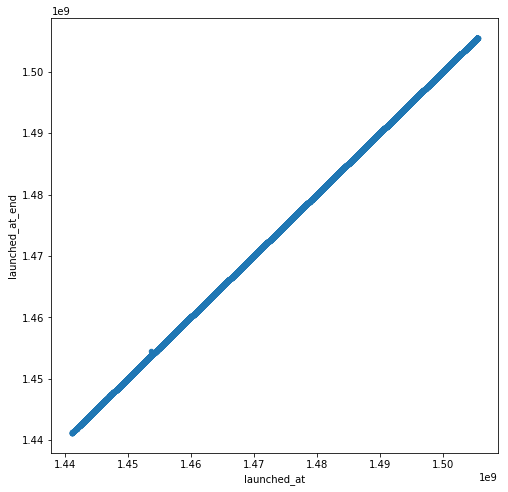

In [18]:
df_projects.plot(x='launched_at', y='launched_at_end', kind='scatter', figsize=(8,8))

In [19]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['launched_at'] != df_projects['launched_at_end']).value_counts()

False    65037
True         1
dtype: int64

In [20]:
# look at values
df_projects[(df_projects['launched_at'] != df_projects['launched_at_end'])][['id','name','launched_at','launched_at_end']]

,id,name,launched_at,launched_at_end
9271,615482414,"Instant Hydrator, Hydrates,All Natural, Digest...",1453784664,1454537838


In [21]:
# keep only original datetime
df_projects.drop('launched_at_end', axis=1, inplace=True)

#### deadline

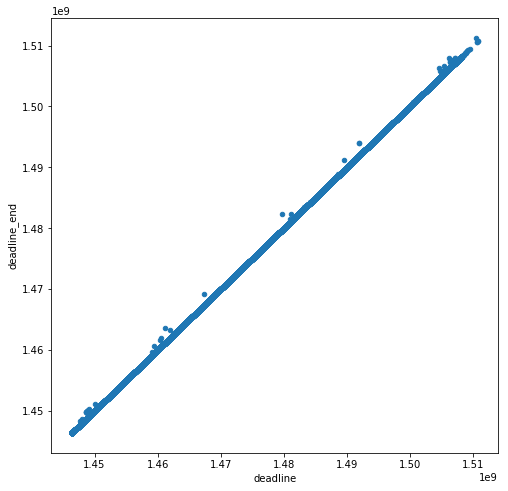

In [22]:
df_projects.plot(x='deadline', y='deadline_end', kind='scatter', figsize=(8,8))

In [23]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['deadline'] != df_projects['deadline_end']).value_counts()

False    64980
True        58
dtype: int64

In [24]:
# look at values
df_projects[(df_projects['deadline'] != df_projects['deadline_end'])][['id','name','deadline','deadline_end']].head(10)

,id,name,deadline,deadline_end
619,603503453,"The Monsieur Barbier Box : Shaving & Music, Ra...",1448922180,1449613380
633,1495917692,2016 Letterpress Calendar . The creative manif...,1449009780,1449441780
1345,1378352264,Casablancas | The Man Who Loved Women,1449164045,1450287245
1366,1866394158,I Love Therefore I Am - Documentary,1448866800,1449730800
1780,1020745465,SECOND CHANCE - DEUXI?ME CHANCE,1450016445,1451226045
2110,2044197681,Welcome to Another World!,1448018810,1448623610
2284,281156070,Würm : a prehistoric RPG,1449239761,1449671761
2381,174456433,Pur cashmere poncho Workshop,1448756490,1449966090
2415,382060495,Pankapu: the Dreamkeeper,1448621976,1449831576
2487,1401246575,#lanouvelleolympe,1448630040,1449839640


In [25]:
# keep only last datetime
df_projects.drop('deadline', axis=1, inplace=True)

#### scraped_at vs launched_at

In [26]:
df_projects[df_projects['launched_at'] > df_projects['scraped_at']][['name','launched_at','scraped_at']].head()

,name,launched_at,scraped_at
241,Totally Mentally Unstable: A Psychedelic Color...,1446388479,1.446387e+09
249,Waupecony River Studio: Modern Handmade Cerami...,1446389578,1.446387e+09
639,The Detroit Bikes C-Type: The American Single ...,1446391659,1.446387e+09
795,Fashion water-repellent clothes - A new standa...,1446388804,1.446387e+09
1028,Vertical Growth Inc.,1446391164,1.446387e+09


In [38]:
x = df_projects['scraped_at'] - df_projects['launched_at']
x[x<0].sort_values()

57147   -5724.0
639     -4715.0
1028    -4220.0
32062   -4047.0
60483   -3853.0
1237    -3611.0
16240   -3496.0
1891    -3421.0
32648   -2988.0
1173    -2823.0
249     -2634.0
53263   -2287.0
23651   -2140.0
7820    -2121.0
16922   -1874.0
795     -1860.0
32013   -1644.0
23916   -1600.0
23638   -1595.0
241     -1535.0
56864   -1331.0
55145    -758.0
3788     -668.0
60343    -456.0
57041    -448.0
5306     -403.0
dtype: float64

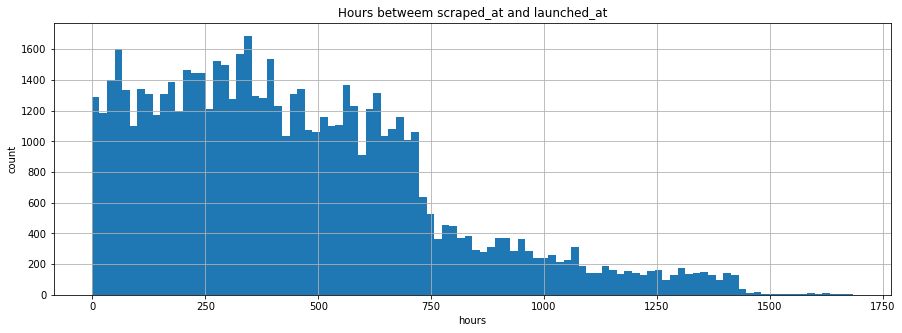

In [39]:
(x / (60*60)).hist(bins=100, figsize=(15,5))
plt.title('Hours since launched_at to scraped_at')
plt.xlabel('hours')
plt.ylabel('count')

In [110]:
# add 5800 seconds to scraped_at to fix timezone issues
#df_projects['scraped_at'] = df_projects['scraped_at'] - 5800

In [106]:
x = df_projects['scraped_at'] - df_projects['launched_at']
x[x<0].sort_values()

57147   -5724.0
639     -4715.0
1028    -4220.0
32062   -4047.0
60483   -3853.0
1237    -3611.0
16240   -3496.0
1891    -3421.0
32648   -2988.0
1173    -2823.0
249     -2634.0
53263   -2287.0
23651   -2140.0
7820    -2121.0
16922   -1874.0
795     -1860.0
32013   -1644.0
23916   -1600.0
23638   -1595.0
241     -1535.0
56864   -1331.0
55145    -758.0
3788     -668.0
60343    -456.0
57041    -448.0
5306     -403.0
dtype: float64

#### scraped_at vs deadline_end

In [47]:
df_projects[df_projects['deadline_end'] < df_projects['scraped_at']][['name','deadline_end','scraped_at']].head()

,name,deadline_end,scraped_at
6943,Buddha's Path to Freedom,1450358578,1.450359e+09
7566,Cloud-Based ERP,1450357140,1.450359e+09
10372,Introspectus: entre el pincel y la pluma,1453974515,1.453982e+09
21285,Support Larry and Nick Montague's New Hip Hop ...,1463289802,1.463290e+09
21702,"Postcard Views of Durham, NC: An Aerial Photog...",1463284740,1.463290e+09


In [48]:
x = df_projects['deadline_end'] - df_projects['scraped_at']
x[x<0].sort_values()

28658   -877382.0
25776   -876193.0
28181   -873179.0
25783   -872767.0
23652   -872664.0
24177   -872406.0
28657   -872360.0
25622   -872352.0
27139   -872269.0
25119   -872006.0
27062   -870204.0
28513   -869650.0
27173   -868804.0
24878   -868744.0
23635   -868388.0
23094   -866944.0
26411   -865218.0
26246   -865144.0
28689   -861740.0
28347   -861618.0
29113   -860847.0
28303   -855128.0
26797   -854869.0
27325   -854326.0
27125   -853173.0
28763   -850121.0
27429   -849857.0
24998   -849368.0
28619   -846880.0
29121   -846398.0
           ...   
42471     -4004.0
34571     -3839.0
48004     -3716.0
48620     -3373.0
34548     -3326.0
42027     -3325.0
44625     -3266.0
63534     -2951.0
26997     -2950.0
46829     -2648.0
38568     -1840.0
41687     -1838.0
7566      -1678.0
42160     -1548.0
36332     -1468.0
63080     -1454.0
62683     -1446.0
41722     -1436.0
41252     -1141.0
63314      -946.0
62929      -808.0
37648      -477.0
33949      -439.0
37967      -419.0
41816     

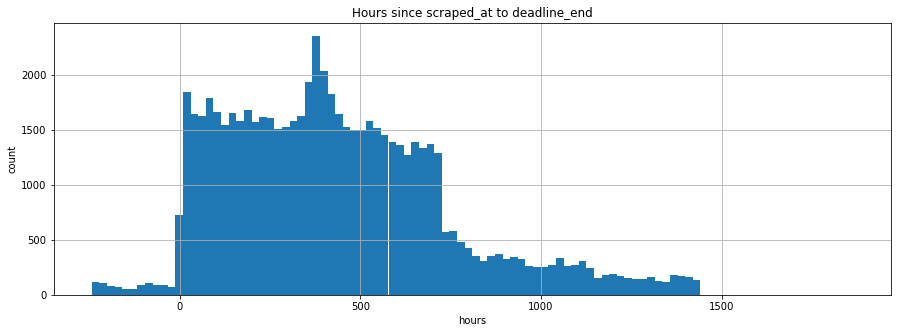

In [49]:
(x / (60*60)).hist(bins=100, figsize=(15,5))
plt.title('Hours since scraped_at to deadline_end')
plt.xlabel('hours')
plt.ylabel('count')

In [50]:
df_projects.to_csv('data/projects_merged.csv')

# TODO:

In [ ]:
os.path.getmtime(r'C:\Users\Patrik\Downloads\webrobots.iokickstarter-datasets\Kickstarter_2016-07-15T02_04_40_862Z\Kickstarter.csv')

In [ ]:
df_projects = pd.read_csv('data/projects_merged.csv', encoding='cp1252', index_col=0)
df_projects.info()